In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, Marker

In [12]:
# Load dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

In [13]:
# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
### Task 1: Restaurant Ratings
common_rating = df['Aggregate rating'].value_counts().idxmax()
avg_votes = df['Votes'].mean()
print(f"Most Common Rating: {common_rating}")
print(f"Average Number of Votes: {avg_votes:.2f}")

Most Common Rating: 0.0
Average Number of Votes: 156.91


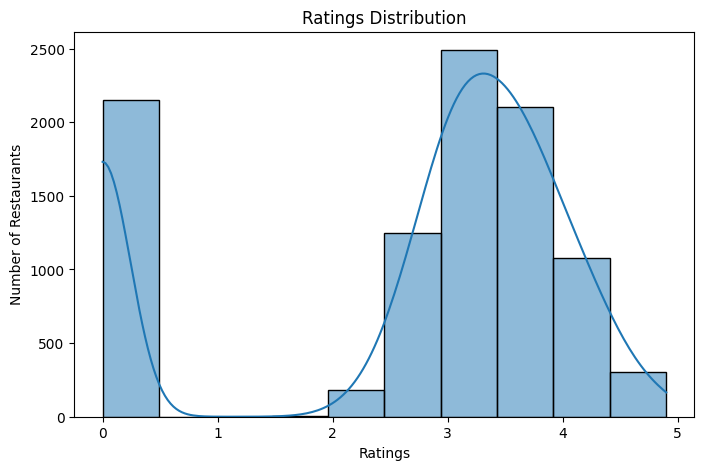

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.xlabel("Ratings")
plt.ylabel("Number of Restaurants")
plt.title("Ratings Distribution")
plt.show()

In [16]:
### Task 2: Cuisine Combination
top_combinations = df['Cuisines'].value_counts().head(5)
avg_ratings_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nMost Common Cuisine Combinations:\n", top_combinations)
print("\nTop Rated Cuisine Combinations:\n", avg_ratings_cuisine.head(5))


Most Common Cuisine Combinations:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

Top Rated Cuisine Combinations:
 Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregate rating, dtype: float64


In [17]:
### Task 3: Geographic Analysis
m = Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for _, row in df.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)
m.save("restaurant_map.html")
print("\nMap saved as 'restaurant_map.html'")


Map saved as 'restaurant_map.html'


In [18]:
### Task 4: Restaurant Chains
chains = df['Restaurant Name'].value_counts()
popular_chains = chains[chains > 1]
print("\nIdentified Restaurant Chains:\n", popular_chains)


Identified Restaurant Chains:
 Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


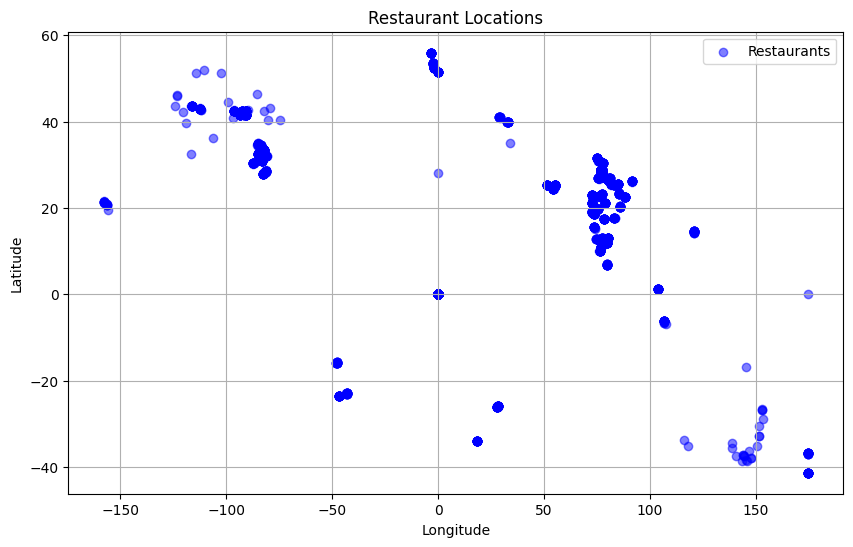

In [19]:
### local version of task 3
# Plot restaurant locations using latitude and longitude
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue', label="Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.legend()
plt.grid(True)
plt.show()